In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("10_percent_clean.csv", parse_dates=["Trip Start Timestamp"])
data.head(1)

,Unnamed: 0.1,Unnamed: 0,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
0,1,10,01fb7b0a39770bf4030110323f25e564bd46deb0,2019-01-01,01/01/2019 12:00:00 AM,249.0,0.8,1,41.970245,-87.713435,41.964652,-87.721017


In [3]:
#add weather data
weather = pd.read_csv("weather_hourly_chicago.csv", parse_dates=["date_time"])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  43788 non-null  datetime64[ns]
 1   max_temp   43788 non-null  float64       
 2   min_temp   43788 non-null  float64       
 3   precip     43790 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 MB


In [4]:
#merge
data["year_hour"] = data["Trip Start Timestamp"].apply(lambda x: f"{x.year}-{x.month}-{x.day}-{x.hour}")
weather["year_hour"] = weather["date_time"].apply(lambda x: f"{x.year}-{x.month}-{x.day}-{x.hour}")
data_weather = data.merge(weather[["max_temp","min_temp","precip", "year_hour"]], left_on="year_hour",right_on="year_hour", how="left")
data_weather.drop(["year_hour","Unnamed: 0.1","Unnamed: 0"], axis=1, inplace=True)
data_weather["max_temp"] = data_weather["max_temp"].bfill()
data_weather["min_temp"] = data_weather["min_temp"].bfill()
data_weather["precip"] = data_weather["precip"].bfill()
data_weather.dropna(inplace=True)
data_weather.describe()

,Trip Seconds,Trip Miles,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,max_temp,min_temp,precip
count,1.035632e+07,1.035632e+07,1.035632e+07,1.035632e+07,1.035632e+07,1.035632e+07,1.035632e+07,1.035632e+07,1.035632e+07,1.035632e+07
mean,9.888126e+02,4.889871e+00,1.243186e+00,4.189185e+01,-8.766179e+01,4.189259e+01,-8.766375e+01,9.878927e+00,9.802515e+00,1.163537e-01
std,6.939861e+02,4.782713e+00,1.457325e+00,5.888837e-02,5.480127e-02,5.911214e-02,5.925789e-02,1.178937e+01,1.178438e+01,3.206487e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,4.165022e+01,-8.791362e+01,4.165022e+01,-8.791362e+01,-3.060000e+01,-3.060000e+01,0.000000e+00
25%,5.130000e+02,1.700000e+00,1.000000e+00,4.187741e+01,-8.767531e+01,4.187867e+01,-8.767618e+01,1.100000e+00,6.000000e-01,0.000000e+00
50%,8.110000e+02,3.200000e+00,1.000000e+00,4.189322e+01,-8.764991e+01,4.189266e+01,-8.764991e+01,9.400000e+00,8.900000e+00,0.000000e+00
75%,1.259000e+03,6.200000e+00,1.000000e+00,4.192862e+01,-8.763096e+01,4.192897e+01,-8.763141e+01,2.000000e+01,2.000000e+01,0.000000e+00
max,7.044000e+04,2.766000e+02,4.097000e+03,4.202122e+01,-8.752995e+01,4.202122e+01,-8.752995e+01,3.500000e+01,3.500000e+01,1.000000e+00


In [5]:
#conveniece
data_weather["Trip min"] = data_weather["Trip Seconds"].apply(lambda x:int(x/60))


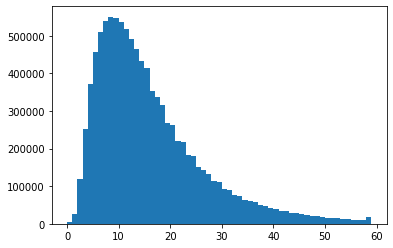

In [6]:
# trip time distribution
plt.hist(data_weather["Trip min"], bins=range(0,60))
plt.show()

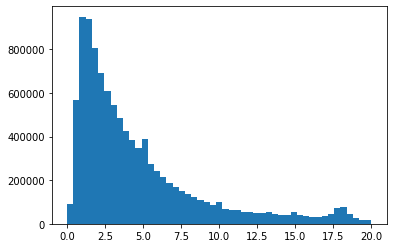

In [7]:
plt.hist(data_weather["Trip Miles"], bins=np.linspace(0,20,50))
plt.show()

In [9]:
#data_weather.to_csv("10_percent_weather.csv")